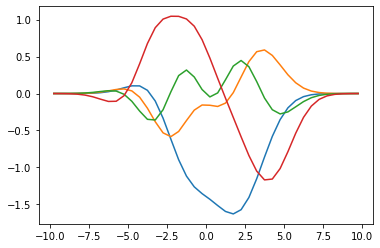

In [214]:
import numpy as np
import matplotlib.pyplot as plt

num_pts = 40
num_pack = 5
num_wave = 1000

x = np.linspace(-10,10,num=2*num_pts+1)[1:-1:2][np.newaxis,:]

def p(x, sigma, mu, mags):
    return mags*(1/(np.sqrt(2*np.pi)*sigma))*np.e**(-(x-mu)**2/(2*sigma**2))

def px(x, sigma, mu, mags):
    return -p(x, sigma, mu, mags)*(x-mu)/sigma**2

def pxx(x, sigma, mu, mags):
    return (-sigma**2+(x-mu)**2)/sigma**4*p(x,sigma,mu,mags)

def pxxx(x, sigma, mu, mags):
    return (3*(x-mu)*sigma**2+(x-mu)**3)/sigma**6*p(x,sigma,mu,mags)

def pxxxx(x, sigma, mu, mags):
    return (3*sigma**4-6*(x-mu)**2*sigma**2+(x-mu)**4)/sigma**8*p(x,sigma,mu,mags)

def pxxxxx(x, sigma, mu, mags):
    return (-15*(x-mu)*sigma**4+10*(x-mu)**3*sigma**2-(x-mu)**5)/sigma**10*p(x,sigma,mu,mags)
    
sigmas = np.array([1.5]*num_pack*num_wave)[:,np.newaxis]
#mus = np.array([0.0,0.5])
mus = (np.random.rand(num_pack*num_wave,)*6-3)[:,np.newaxis]
mags = ((np.random.rand(num_pack*num_wave,)-0.5)*2000)[:,np.newaxis]

p_ = p(x,sigmas,mus,mags)
px_ = px(x,sigmas,mus,mags)
pxx_ = pxx(x,sigmas,mus,mags)
pxxx_ = pxxx(x,sigmas,mus,mags)
pxxxx_ = pxxxx(x,sigmas,mus,mags)
pxxxxx_ = pxxxx(x,sigmas,mus,mags)

p_ = np.mean(p_.reshape(num_pack, num_wave, num_pts), axis=0)
px_ = np.mean(px_.reshape(num_pack, num_wave, num_pts), axis=0)
pxx_ = np.mean(pxx_.reshape(num_pack, num_wave, num_pts), axis=0)
pxxx_ = np.mean(pxxx_.reshape(num_pack, num_wave, num_pts), axis=0)
pxxxx_ = np.mean(pxxxx_.reshape(num_pack, num_wave, num_pts), axis=0)
pxxxxx_ = np.mean(pxxxxx_.reshape(num_pack, num_wave, num_pts), axis=0)

f_ = 6*p_*px_ - pxxx_
fx_ = 6*px_*px_ + 6*p_*pxx_ - pxxxx_
fxx_ = 12*px_*pxx_ + 6*px_*pxx_ + 6*p_*pxxx_ - pxxxxx_

psi = np.concatenate([p_[:,:,np.newaxis]], axis=2)

f = 6*p_*px_ - pxxx_


plt.plot(x[0],np.mean(p(x,sigmas,mus,mags),axis=0))
plt.plot(x[0],np.mean(px(x,sigmas,mus,mags),axis=0))
plt.plot(x[0],np.mean(pxx(x,sigmas,mus,mags), axis=0))
plt.plot(x[0],np.mean(pxxx(x,sigmas,mus,mags), axis=0))

In [205]:
np.mean((6*p_*px_)**2)

10556279.913715424

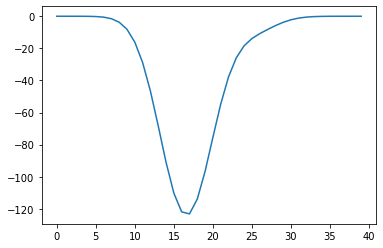

In [213]:
plt.plot(p_[0])

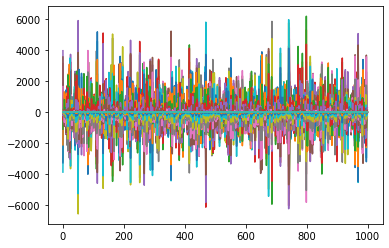

In [211]:
plt.plot(p_*px_)

In [175]:
- pxxx_

(1000, 40, 1)